[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

In [1]:
import os
import zipfile
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
np.random.seed(99)

In [2]:
zf = zipfile.ZipFile('../data/skin-cancer-mnist-ham10000.zip')
metadata = pd.read_csv(zf.open('HAM10000_metadata.csv'))
display(metadata.head(), metadata.tail())

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


,lesion_id,image_id,dx,dx_type,age,sex,localization
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face
10014,HAM_0003521,ISIC_0032258,mel,histo,70.0,female,back


In [3]:
os.listdir('../data/skin-cancer-mnist-ham10000')

['HAM10000_images_part_1',
 'HAM10000_images_part_2',
 'HAM10000_metadata.csv',
 'hmnist_28_28_L.csv',
 'hmnist_28_28_RGB.csv',
 'hmnist_8_8_L.csv',
 'hmnist_8_8_RGB.csv']

## dx feature:

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

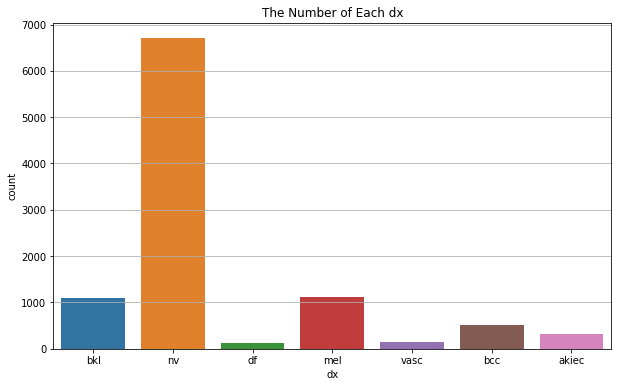

In [4]:
# metadata["dx"].groupby("dx").count()
display(metadata["dx"].value_counts())
plt.figure(figsize=(10, 6))
plt.grid()
sns.countplot(metadata["dx"])
plt.title("The Number of Each dx")
plt.show()

## dx_type feature:

histo        5340
follow_up    3704
consensus     902
confocal       69
Name: dx_type, dtype: int64

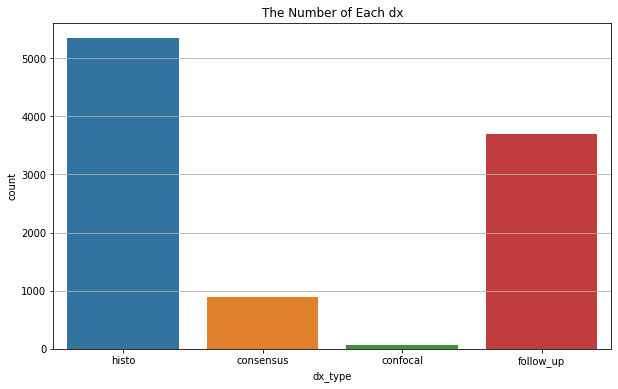

In [5]:
display(metadata["dx_type"].value_counts())
plt.figure(figsize=(10, 6))
plt.grid()
sns.countplot(metadata["dx_type"])
plt.title("The Number of Each dx")
plt.show()

## age feature:

C:\Users\zhuwe\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\zhuwe\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


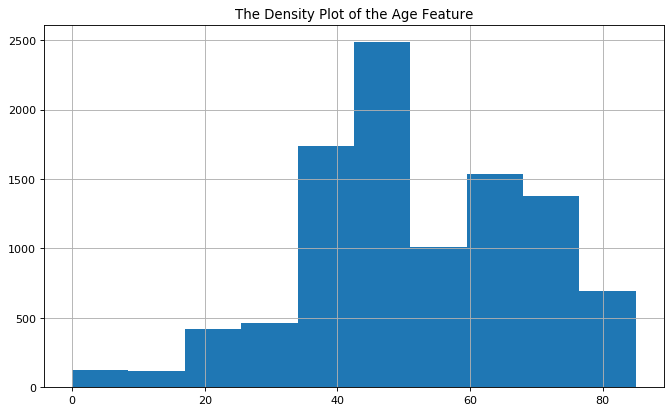

In [6]:
# Plot the hisstogram plot of the age:
plt.figure(figsize=(10, 6), dpi=80, frameon=False, clear=True)
plt.hist(metadata["age"])
plt.title("The Density Plot of the Age Feature")
plt.grid()
plt.show()

In [7]:
metadata["age"].describe()

count    9958.000000
mean       51.863828
std        16.968614
min         0.000000
25%        40.000000
50%        50.000000
75%        65.000000
max        85.000000
Name: age, dtype: float64

## gender

male       5406
female     4552
unknown      57
Name: sex, dtype: int64

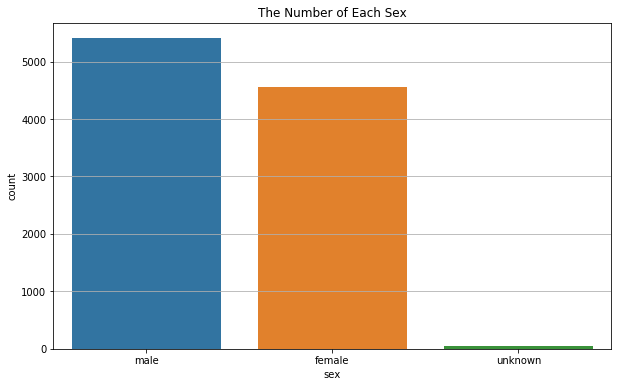

In [8]:
display(metadata["sex"].value_counts())
plt.figure(figsize=(10, 6))
plt.grid()
sns.countplot(metadata["sex"])
plt.title("The Number of Each Sex")
plt.show()

## Localization

back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: localization, dtype: int64

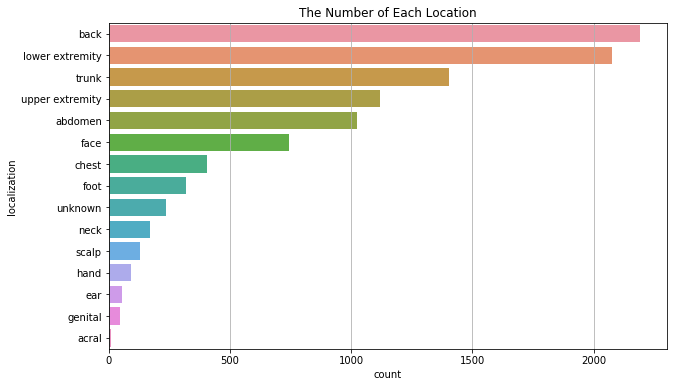

In [9]:
display(metadata["localization"].value_counts())
plt.figure(figsize=(10, 6))
plt.grid()
sns.countplot(y=metadata["localization"], order = metadata['localization'].value_counts().index)
plt.title("The Number of Each Location")
plt.show()

## Relationships between dx and dx_type

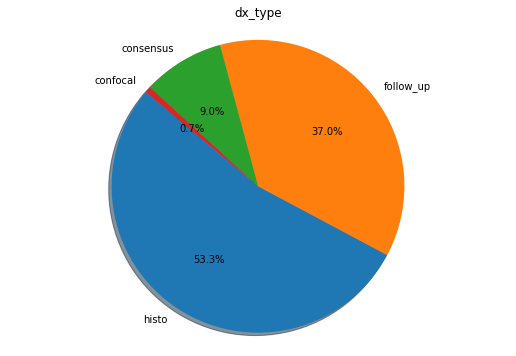

In [10]:
plt.figure(figsize=(9,6))
labels = "histo","follow_up","consensus","confocal"
sizes = [5340,3704,902,69]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("dx_type")
plt.show()

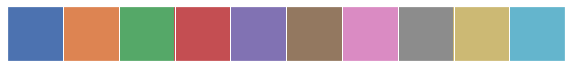

In [11]:
import seaborn as sns; sns.set()
sns.palplot(sns.color_palette())

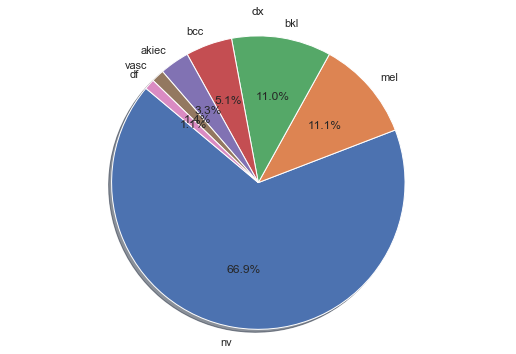

In [12]:
plt.figure(figsize=(9,6))
labels = "nv","mel","bkl","bcc","akiec","vasc","df"
sizes = [6705,1113,1099,514,327,142,115]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("dx")
plt.show()

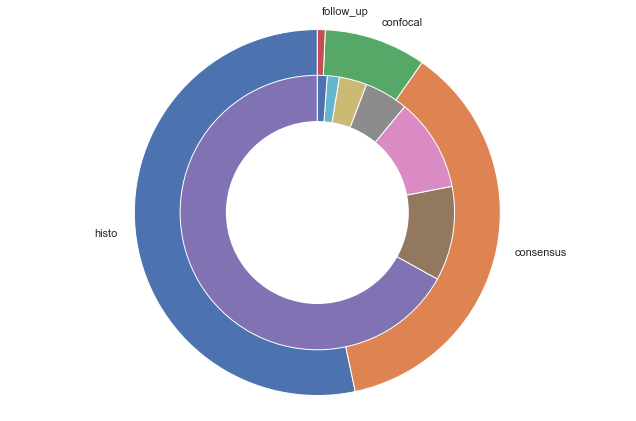

In [13]:
sizes = [5340,3704,902,69]
sizes_dx = [6705,1113,1099,514,327,142,115]
labels = metadata["dx_type"].unique()

plt.figure(figsize=(9,6))
plt.pie(sizes, labels=labels, startangle=90,frame=True)
plt.pie(sizes_dx,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.show()